In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.datasets import load_boston    

In [2]:
boston = load_boston() #load data matrix to boston -> investigate keys
boston_data = pd.DataFrame(boston.data) #create dataframe from matrix
boston_data.columns = boston.feature_names #set dataframe columns from feature_names
boston_data["PRICE"] = boston.target
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
X, y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1] #define X and y
boston_data_dmatrix = xgb.DMatrix(data=X, label=y) #i will use it later

#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
xg_reg = xgb.XGBRegressor(
    objective="reg:linear", 
    colsample_bytree=0.3, 
    learning_rate=0.3,
    max_depth=5,
    reg_lambda=1, 
    n_estimators=10) #define XGB model to predict

xg_reg.fit(X_train, y_train) #fit model

preds= xg_reg.predict(X_test)

# print(np.sqrt(mean_squared_error(preds, y_test)))
print(mean_absolute_error(preds, y_test))


[15:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3.1457064983891505


In [5]:
params = {
    "objective" : "reg:linear",
    "colsample_bytree" : 0.3,
    "learning_rate" :0.3,
    "max_depth" : 5,
    "alpha" : 10
}

cv_results = xgb.cv(
    dtrain=boston_data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123
    )

pd.set_option('display.max_rows', None)
cv_results.head(100)

[15:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.352567,0.012048,17.354313,0.001677
1,12.998922,0.056980,12.994745,0.107389
2,9.971335,0.219584,10.044722,0.323191
3,7.674173,0.046481,7.967775,0.201156
4,6.238753,0.145578,6.720836,0.340294
5,5.194406,0.153373,5.912716,0.297667
6,4.416165,0.045499,5.427787,0.227750
7,3.887400,0.084919,5.141721,0.242972
8,3.576676,0.084330,4.935209,0.232458
9,3.253552,0.096864,4.668678,0.301483


[15:23:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


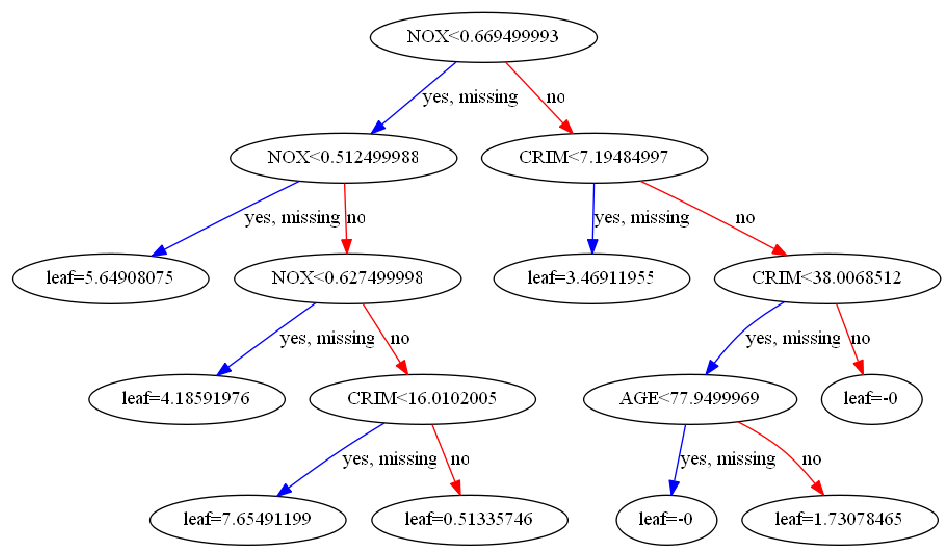

In [10]:
from graphviz import Digraph

xg_reg = xgb.train(dtrain=boston_data_dmatrix, params=params, num_boost_round=10)

xgb.plot_tree(xg_reg, num_trees=1)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

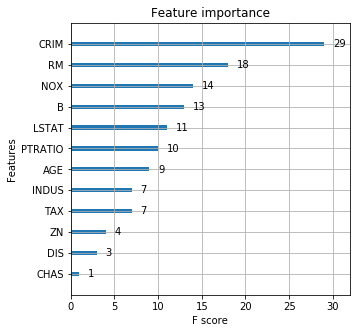

In [12]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


In [8]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16


In [122]:
import seaborn as sns

linear_test_data = pd.read_csv("original.csv", sep=";")

# fig = plt.figure(figsize=(7, 7))
# sns.scatterplot(linear_test_data.deneyim, linear_test_data.maas)
# plt.show()

type(linear_test_data)


pandas.core.frame.DataFrame